In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Final Project: Predictive Modelling and Model Comparision

Names: Natalia Jamula, Harrison Arons

Student IDs: 518225, 525302

Collaborators:


## Instructions

This homework is an _open-ended final project_ for our class.

We will focus on Data Profiling and Supervise Machine Learning including Feature Engineering, Feature Selection, and Model Selection & Comparison.

We will be using the techniques and approaches introduced throughout the course focusing on the following topics:

* [M0] Python for DS
* [M1] The DS and ML Workflows
* [M2] Exploratory Data Analsyis
* **[M3] Linear Regression (if applicable - depends on problem/dataset)**
* **[M4] Linear Classification (if applicable - depends on problem/dataset)**
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M6] Ethical Thinking for Data Science (if applicable - depends on problem/dataset)
* **[M7] Performance Evaluation: Overfitting & Cross-Validation**
* **[M8] Clustering K-Means (if applicable - depends on problem/dataset)** 
* **[M9] Similarity-based Learning K-NN (if applicable - depends on problem/dataset)**
* **[M10] More Models (Decision Tree, Random Forest, Neural Network) for Feature Engineering & Model Comparision & Selection**
* **[M11] DS Workflow in Python: Data Profiling and ML Pipelines**

The main focus of this project is majorly on the last modules [M7]-[M11]. In particular, it will be helpful to review **Lab 3 & hw 3 onwards for more clarification**.
Most of the things you will do in this final project are explained in `Lab10` and `Lab11`. Then, review the other labs and hws to recap the general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

> **!! Do not use any packages/methods/models that we did not discuss in this class !!**

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# Used Google Gemini for help adding a colorbar: https://gemini.google.com/share/f6b9b4545ea 
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings
# Used Google Gemini for help adding a colorbar: https://gemini.google.com/share/f6b9b4545ea 

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # run this first!

## 1. Introduction

For our final project this semester, we'll take a look at data for Melbourne Housing Price Prediction
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot.


As you have seen throughout the semseter we have learned various techniques to solve a problem task (Classification, Regression, Clustering etc.) starting from problem formulation to EDA to model building to model evaluation and performing feaure engineering and selection in order to improve the model's performance.
You will be combining all the knowledge learned so far in this final project. You will be making assuptions and decisions on your own with appropriate justifications in writeups about how to improve the prediction model using all the tools and techniques learned so far and provide the best model at the end.


The project aims at building a model of housing prices to predict median house values in Melbourne using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Our goal will be to use this dataset to gain some insight about characteristics of different features.
We will be using data profiling from pandas and create models (hopefully more than 3) and compare them to find out which model performed the best and probably explain why it is the best model among all in this data.


### Problem 1.1

Download the data and load it in this notebook for further processing and analysis.

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

melb = pd.read_csv("./utility/data/melb_data.csv")
pd.set_option('display.max_columns', None)
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take? What kind of data science problem is this? What application area does the dataset fall into? What kind of prediction (regression, classification or clustering) we are doing with this dataset and why?
> **Hint**: Recall, our goal is to build a model of housing prices to predict median house values.

**Where does the data come from? How was it obtained?**
Tony Pino's Melbourne Housing data came from https://www.domain.com.au/ The data was obtained from this publicly available results posted by the domain weekly, then cleaned up to include Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from central buisness district, as well as removing homes with no price. 

**How many examples (rows) and features (columns) does the dataset have?**
The dataset includes 13,580 examples, or rows, and 21 columns, or features. 

**What kinds of features are in the dataset -- numerical (discrete/continuous) or categorical(ordinal/nominal)? What values can these features take?**

The dataset include both numerical and categorical features. The "Suburb" feature is categorical-nominal and is ordered alphabetically, ranging from Abbotsford to Yarraville, ranging over 314 distinct suburbs, and can take on any suburb name in the dataset. The "Address" feature is categorical-nominal ranging over 13378 unique addresses, and it can take on the exact address of any property in the dataset. The "Rooms" feature is numerical-discrete, counting the number of rooms in a given property. The "Rooms" feature ranges from 1 to 10, as it can take on a only integer counts of rooms from 1 to 10. The "Type" feature is categorical-nominal with the following notations: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. The "Type" feature ranges from "h" having 9449 examples to "u" with 2017 features to "t" having 1114, but can take on any of the aforementioned labels. The "Price" feature is numerical-continuous, displaying the properties price in Australian dollars, and ranging from 85,000 to 9,000,000, but can theoretically take on any monetary value. The "Method" feature is categorical-nominal with the following notations: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. The "Method" feature ranges from "S" with 9022 to "SP" with 1703 to "PI" with 1564 to "VB" with 1199 to "SA" with 92, but can take on any of the aforementioned labels. The "SellerG" feature is categorical-nominal, naming each property's real estate agents, and ranging over 268 agents, can take on any agent name in the dataset. The "Date" feature is categorical-nominal, recording the date a propert was sold, ranging over 58 unique dates, and can take on any sale date included in the dataset. The "Distance" feature is numerical-continuous, noting the distance between a property and central buisness district (CBD), and ranging from 0 to 48.1, and can take any real-valued measurement within that range. The "Postcode" feature is categorical-nominal, recording the postal code where a property is located, ranging from 3000 to 3977, and can take on any postcode in that domain. "Bedroom2" includes data from another source for the scraped number of bedrooms in a property. "Bedroom2" is a numerical-discrete feature, ranges from 0 to 20, and must take on an integer values. "Bathroom" is also numerical-discrete, recording the number of bathrooms, ranges from 0 to 8, and must take on an integer count for the number of bathrooms and can take only integer values. Likewise, "Car" is a numerical-discrete feature for the number of carspots a property has, ranges from 0 to 10, and must take on an integer number. "Landsize" is numerical-continuous, covering each property's land size, and ranging from 0 to 433014, and can take any non negative value in that range. "BuildingArea" is also numerical-continuous, recording the size of each building in meters, ranging from 0 to 44515 meters, and can take any non negative value in that range. "YearBuilt" is numerical-discrete, noting the date a property was built, ranging from 1196 to 2018, and must take on integer values. "CouncilArea" is categorical-nominal, recording the governing council for a given property's area, and ranging over 33 distinct councils, take on the name of any governing municipal council in the dataset. "Latitude" is numerical-continuous, ranging from -38.18255 to -37.40853. "Longitude" is numerical-continous, ranging from 144.43181 to 145.52635. Both Latitude and Longitude must take on the values of real decimal coordinate values. "Regionname" is categorical-nominal, covering the general region (West, North West, North, North east …etc), ranging over 8 regions, and must take on one of the 8 region labels. "Propertycount" is numerical-discrete, denoting the number of properties that exist in the suburb, ranging from 249 to 21650, and must take on integer values.

**What kind of data science problem is this?**
This data science problem is a buisness problem given that the project aims at building a model of housing prices to predict median house values in Melbourne using the Melbourne Housing Price Prediction dataset. This is a buisness problem because the model aims to predict a monetary price, that being the median housing price in any district, given all the other metrics.

**What application area does the dataset fall into?**
This dataset falls into property and real estate applications. The dataset could be used by investors or other actors in Melbourne who benefit from deriving patterns about properties and their socioeconomic properites.

**What kind of prediction (regression, classification or clustering) we are doing with this dataset and why?**

This is a case of regression, specifically multiple linear regression as we are taking in the input features from the Melbourne Housing Price Prediction dataset and building a model to predict a numerical output feature for the median house values in Melbourne.

### Problem 1.2: Getting Familiar with the Data

Generate the data report using __ProfileReport__ as we did in lab 11.

In [5]:
from ydata_profiling import ProfileReport

#melb.profile_report(correlations={"pearson": {"calculate": True}, "spearman": {"calculate": False}, "kendall": {"calculate": False}, "phi_k": {"calculate": False}, "cramers": {"calculate": False},})

C:\Users\harri\miniconda3\envs\cse2107\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\harri\miniconda3\envs\cse2107\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


### Problem 1.3: Data Description

**Write-up!** What are the major highlights and interesting aspects in the report generated in the previous cell (or in your own EDA process). 
Describe your insights using the data/features/visualizations/statistics. Be sure to consider the relationship among features such as correlation and interaction, as well as distributions, missing data, outliers. Include additional visualizations as necessary.

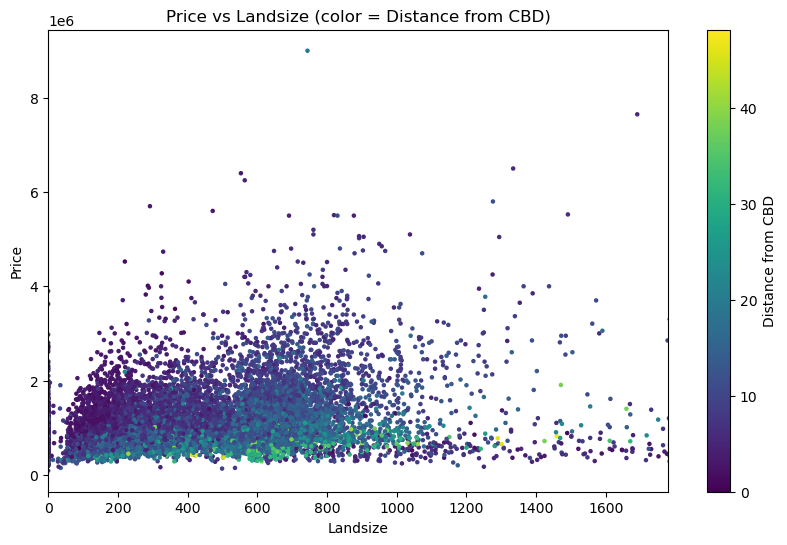

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(
    melb["Landsize"],
    melb["Price"],
    c=melb["Distance"],
    s=5
)
plt.xlim(0, melb["Landsize"].quantile(0.98))
plt.xlabel("Landsize")
plt.ylabel("Price")
plt.title("Price vs Landsize (color = Distance from CBD)")
cbar = plt.colorbar()
cbar.set_label("Distance from CBD")
plt.show()


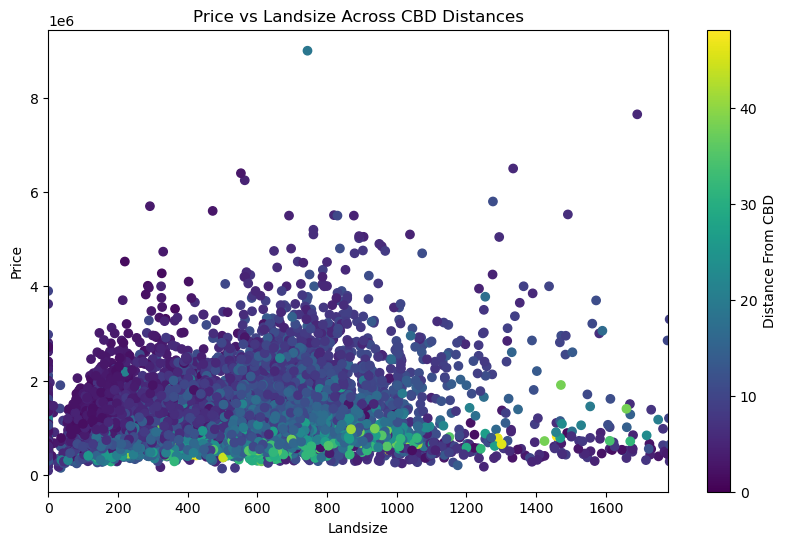

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    melb["Landsize"],
    melb["Price"],
    c=melb["Distance"], 
    cmap='viridis'      
)

plt.colorbar(scatter, label="Distance From CBD")

plt.xlim(0, melb["Landsize"].quantile(0.98))
plt.xlabel("Landsize")
plt.ylabel("Price")
plt.title("Price vs Landsize Across CBD Distances")
plt.show()

Upon first glace, scrolling through the visualization generated in the previous cell, the "Landsize" and "BuildingArea" features stand out seemingly having distributions with just one bar at 0. "Landsize" has 1939 zeros and a maximum of 433,014 so there is a huge range and we are unable to see a clear distribution. Likewise, "BuildingArea" has 6450 missing values, 17 zeros, and a maximum of 44,515, so there is also a massive range impeeded our ability to see the shape of this feature. The distribution for the "Room" feature is about normally distributed with a center around 3 rooms. The dataset overwhelmingly covers the "h" type the most representing houses,cottages,villas, semis,and terraces. The "Price" feature is skewed right with a center around 100,000. The "Distance" feature is also skewed right with the vast majority of the data clustered between 5 and 15. "Bedroom2" is approximately normally distributed with an outlier at 20, and center around 3. This is interesting since the "Room" feature had a center around 3, so I expected the bedroom feature to be lower. The "Bathroom" feature is right skewed with a center around 1.5. The "Car" feature is approximately normally distributed with a center at 1.5. Using the interaction report, unsurprisingly, "Price" has a high coorelation with "Rooms," "Bedroom2," and "Bathroom," and a negative correlation with "Yearbuilt." At first I thought it was interesting that "Price" did not have a strong correlation with "Landsize" or "PropertySize" but then I realized that properities close to or within city downtowns are very small and very expensive, so there must be another factor at place here: Distance from CBD. So in the visualization above we can see that the purple dots are clustered at the lower end of "Landsize" even as price goes up there is a short lived very positive correlation between Price and Landsize, but for the green dots they continue steadly approaching larger landsizes but with a much weaker slope, and these discrepencies are hidden merely by comparing "Price" and "Landsize."

### Problem 1.4: Split the Data

Extract input (X) and output (y) data from the dataset. 

Use the train and test split from the scikit learn library to split the data into 80% training and 20% testing.

Then, initalize the Kfolds. Be sure to use these folds when executing cross validation below so that the results are comparable.

In [8]:
X = melb.loc[:, melb.columns !='Price']
y = melb['Price']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)
kf = KFold(n_splits=10, shuffle=True, random_state=4)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"K-Folds initialized with {kf.get_n_splits()} splits.")

              Suburb           Address  Rooms Type Method   SellerG  \
0         Abbotsford      85 Turner St      2    h      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h      S    Biggin   
2         Abbotsford      5 Charles St      3    h     SP    Biggin   
3         Abbotsford  40 Federation La      3    h     PI    Biggin   
4         Abbotsford       55a Park St      4    h     VB    Nelson   
...              ...               ...    ...  ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h     SP  Williams   
13577   Williamstown       83 Power St      3    h      S     Raine   
13578   Williamstown      96 Verdon St      4    h     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h     SP   Village   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0       3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.

**Write-up!** Why 80% train and 20% test split is considered a good practice? How would you pick the train-test split size if the dataset is relatively small or large? What is the purpose of using cross validation technique and how does it ensure model robustness? What is Data snooping and how do you avoid it?

**Answer here:** (feel free to make multiple cells!)

**Why 80% train and 20% test split is considered a good practice? How would you pick the train-test split size if the dataset is relatively small or large?**

An 80/20 train-test split is good practice because it creates a training set that is large enough to let the model learn effectively and accurately, while also leaving enough data for testing to ensure that the model is not overfit and that there is enough data for effective testing. For a smaller dataset, a larger test set such as a 70/30 train-test split might be considered to ensure that the test set is representative enough of the population. It would be smart to use k-fold cross-validation to account for the limited amount of data available. If the dataset is large, a smaller test set can be used such as a 90/10 split. This will ensure that a sufficient amount of the data is being used for the training while the test set still has enough data to be representative of the population/overall data.

**What is the purpose of using cross validation technique and how does it ensure model robustness? What is Data snooping and how do you avoid it?**

Using cross validation ensures that every data point in the training data is also is used to validate a model, meaning that the final hyperparameters are more stable when compared to unseen future data. Data snooping involves using data to evaluate the model's performance on data that has already been used to train the model. Data snooping makes the evaluation overly optimistic, as the model has already been fit to the data being tested. This can be avoided through proper train-test or train-validation-test splits. For example, when performing cross validation, the test set can not be used at all. Additionally, feature engineering should be performed only on the training set.

## Problem 2: Preprocessing and Baseline Models

### Problem 2.1: Preprocessing for the Baseline Models

Let's start by preprocessing the data so that we can train some baseline models. Note that categorical variables will need to be encoded and missing values should be appropriately delt with using imputation. Also, some models may require scaling. Imputation and scaling should be done in a manner that aovids data snooping.
> **Hint:** The use of Scikit-Learn's Pipelines are highly encouraged!

> **Hint:** Not all columns in the provided dataset can or should be used as features directly. If you see any features that need feature extraction to be useful or that don't make any sense to be used, remove them and **document/justify your choices**. Go back to features left/marked for feature extraction in Pronlem 3. 

In [9]:
# your code here
X_train.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                53
Landsize            0
BuildingArea     5192
YearBuilt        4339
CouncilArea      1112
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
X_train.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [11]:
for dataset in [X_train, X_test]:
    dataset['Postcode'] = dataset['Postcode'].astype(object)
    dataset['Rooms'] = dataset['Rooms'].astype(float)
    dataset.rename(columns={'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}, inplace=True)

In [12]:
unique_counts = X_train.select_dtypes(include=['object']).nunique()
print(unique_counts)

Suburb           306
Address        10733
Type               3
Method             5
SellerG          254
Date              58
Postcode         192
CouncilArea       33
Regionname         8
dtype: int64


In [13]:
for dataset in [X_train, X_test]:
    dataset.drop(['BuildingArea', 'YearBuilt', 'CouncilArea', 'Date', 'Suburb', 'Address', 'SellerG', 'Postcode'], axis=1, inplace=True) 

In [14]:
X_train.dtypes

Rooms            float64
Type              object
Method            object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
Latitude         float64
Longitude        float64
Regionname        object
Propertycount    float64
dtype: object

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
np.random.seed(12)

cat_cols = ['Type', 'Method', 'Regionname']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

num_cols = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Latitude', 'Longitude', 'Propertycount']

# your code here 
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scale', RobustScaler())
    ])

In [17]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [18]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Problem 2.2: Perform Linear Regression

Perform Linear Regression on training data. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) and R^2 value from Linear Regression for test data set.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lin = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_lin}')
print(f'Coefficient of Variation: {cv}')

RMSE: 383558.5993652246
R-Squared: 0.613274429290471
Coefficient of Variation: 0.3589836061650488


**Write-up!** What does R^2 tell us about the model's performance? What does RMSE tell us about the model's performance?

**Answer here:** (feel free to make multiple cells!)

The R^2 suggests that 61.3% of the variation in price for the Melbourne houses in our dataset can be explained by our specific linear regression model. 61% is strong. Our RMSE of 383558.60 suggests that our model's predictions of the price of Melbourne homes is off by, on average, 383,558 dollars. Our mean for Price (from the testing sample) is 1,068,457 dollars. Therefore, our Correlation of Variation = 383558/1068457 = .359. This is not a very strong CV, as it means we have high variability relative to the mean.

### Problem 2.3 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression using cross validation to tune any hyperparameters, such as `n_neighbors`.

Then, using the optimal hyperparameters, train a K-Nearest Neighbors Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from K-Nearest Neighbors Regression on the test datset.

In [20]:
from sklearn.neighbors import KNeighborsRegressor


def knn_kfolds(X, y, n_neighbors, random_state=None):
    scores = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        
        X_train_fold = X[train_idx]
        X_val_fold = X[val_idx]
        y_train_fold = y[train_idx]
        y_val_fold = y[val_idx]
        
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(X_train_fold, y_train_fold)
        
        score = model.score(X_val_fold, y_val_fold)
        scores.append(score)
        
    avg_score = np.mean(scores)
    return avg_score

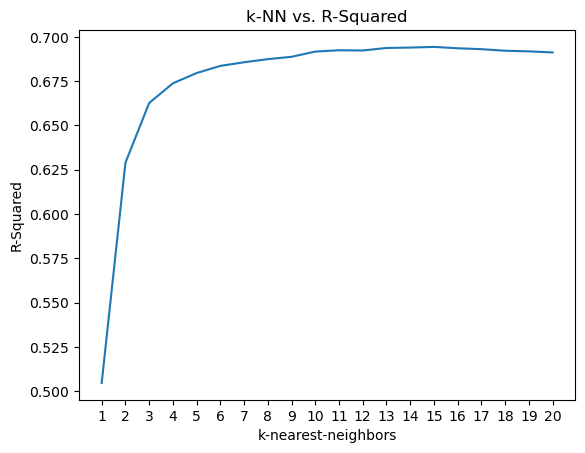

In [21]:
avg_scores = []
k_values = range(1,21)
for i in k_values:
    avg_scores.append(knn_kfolds(X_train_processed, y_train.values, i, random_state=41))

plt.plot(k_values, avg_scores)
plt.xlabel("k-nearest-neighbors")
plt.ylabel("R-Squared")
plt.xticks(k_values)
plt.title("k-NN vs. R-Squared")
plt.show()

In [22]:
k=15
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_processed, y_train)
        
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_kn = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_kn}')
print(f'Coefficient of Variation: {cv}')

RMSE: 316011.71801103983
R-Squared: 0.7374900224349108
Coefficient of Variation: 0.29576452283890814


**Write-up!** How K-NN is different than Linear regression model and what additional steps you have to take for KNN Regression?

**Answer here:** (feel free to make multiple cells!)

K-NN uses similar instances to predict an certain instance's Price, as opposed to minimizing the sum of squared errors to create a prediction line that is used for all of the instances. K-NN is more complex/takes more steps because we need to (or at least ought to) use cross-validation to determine which amount of k-nearest neighbors minimizes.

### Problem 2.4 : Perform Decision Tree Regression 

Perform Decision Tree Regression using cross validation to tune any hyperparameters, such as `max_depth`.

Then, using the optimal hyperparameters, train a Decision Tree Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Decision Tree Regression on the test dataset.

In [23]:
from sklearn.tree import DecisionTreeRegressor

pipeline_DT = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor(max_depth=2, random_state=42))])

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'regressor__max_depth': [2, 5, 10]}

grid_search = GridSearchCV(pipeline_DT, param_grid=param_grid, cv=kf)

# display the pipeline
grid_search

grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Best Accuracy: 0.6465717775636092
Best Parameters: {'regressor__max_depth': 10}


In [25]:
model = DecisionTreeRegressor(max_depth=10, random_state=40)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_dt = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_dt}')
print(f'Coefficient of Variation: {cv}')

RMSE: 341274.70668859227
R-Squared: 0.6938405668852985
Coefficient of Variation: 0.3194088858983818


**Write-up!** What are the advantages or disadvantages of using Decision Tree over Linear Regression and KNN?

**Answer here:** (feel free to make multiple cells!)

Decision trees can capture non-linearity, which a Linear Regression model won't be able to predict. Decision trees naturally decides what features are more important, meaning noise is less impactful than it is for KNNs. However, deecision trees can't extrapolate as well as linear regression models, and decision boundaries for decision trees are less smooth than those for KNN models.

### Problem 2.5 : Perform Random Forest Regression

Perform Random Forest Regression using cross validation to tune any hyperparameters, such as `n_estimators`.

Then, using the optimal hyperparameters, train a Random Forest Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Random Forest Regression on the test dataset.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators = 50, max_depth=2, random_state=42))])

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'regressor__n_estimators': [50, 100, 250],
                      'regressor__max_depth': [5]} #we did not have time to do more hyperparameters, so we picked 5 as an estimate

grid_search = GridSearchCV(pipeline_RF, param_grid=param_grid, cv=kf)

# display the pipeline
grid_search

grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Best Accuracy: 0.6677930374723593
Best Parameters: {'regressor__max_depth': 5, 'regressor__n_estimators': 250}


In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250, max_depth=5, random_state=40)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_rf}')
print(f'Coefficient of Variation: {cv}')

RMSE: 340542.78875585063
R-Squared: 0.6951523739634954
Coefficient of Variation: 0.3187238626989351


**Write-up!** Why does a Random Forest ensure better results than a single Decision Tree? 

**Your Answer Here:** (feel free to make multiple cells!)

Random forests use many trees. By using many trees, it lets the uncorrelated errors of each tree "cancel out", ultimately bringing error closer to zero. By using different subsets of the data for each tree, it means that outliers in the data won't make as much as an impact. Furthermore, using random features for each tree works to make the trees uncorrelated.

## 3. Feature Extraction and Selection

### Problem 3.1: Feature Extraction

Apply **feature extraction** in this section in order to derive at least 2 new features. Be sure to apply the same feature extraction to both the training and testing datasets.

**Do this!** In the cells below, **explain** and perform the steps for feature extraction. Make sure that your implementations and write-ups are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [29]:
import numpy as np

train_landsize_safe = np.where(X_train["Landsize"] == 0, np.nan, X_train["Landsize"])
test_landsize_safe  = np.where(X_test["Landsize"] == 0, np.nan, X_test["Landsize"])

X_train["car_per_area"] = X_train["Car"] / train_landsize_safe
X_test["car_per_area"]  = X_test["Car"] / test_landsize_safe


X_train["rooms_per_area"] = X_train["Rooms"] / train_landsize_safe
X_test["rooms_per_area"]  = X_test["Rooms"] / test_landsize_safe


X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)


X_train.head()

,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Latitude,Longitude,Regionname,Propertycount,car_per_area,rooms_per_area
5264,3.0,h,PI,2.6,3.0,2.0,2.0,345.0,-37.81590,144.99400,Northern Metropolitan,14949.0,0.005797,0.008696
9108,2.0,h,S,6.7,2.0,1.0,1.0,208.0,-37.74373,144.95783,Northern Metropolitan,11204.0,0.004808,0.009615
4486,5.0,h,S,5.5,5.0,3.0,1.0,450.0,-37.77010,144.98860,Northern Metropolitan,11364.0,0.002222,0.011111
4633,3.0,h,S,9.9,3.0,1.0,1.0,470.0,-37.73150,144.93990,Northern Metropolitan,7485.0,0.002128,0.006383
12231,4.0,h,SP,35.2,4.0,3.0,2.0,675.0,-38.06508,145.35417,Eastern Victoria,17093.0,0.002963,0.005926


**Write up!** Explain the feature extraction methods have you implemented and why.

**Your Answer Here:** Our first feature is car per area. This captures the relative amount of space for vehicles compared to the total area of the property. We achieved this by deviding the number of spaces for cars by the relative land size. We hope that this will help capture the relative number of people to be expected to live on the property (as car space often limits the number of people living on a property) in relation to the amount of land. Our second feature is the rooms per area, which we achieved by dividing the number of rooms by the land size. As we removed the building size feature, we hope that this will capture the relative amount of space that the building takes up on the property. Although this is not a perfect measure, its implementation for all rows will help capture important relationships between the sizes of the properties.

### Problem 3.2: Feature Selection

Using the original and extracted features as input, perform **feature selection** in this section (statistical, model-based, or iterative feature selection). Be sure to apply the same feature selection to both the training and testing datasets. Note that categorical variables will need to be encoded and missing values should be appropriately delt with using imputation.

**Do this!** In the cells below, **explain** and perform the steps necessary for feature selection. Make sure that your implementations and write-ups are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [30]:
# your code here
from sklearn.ensemble import RandomForestClassifier

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=28)
model.fit(X_train_processed,y_train)
importances = model.feature_importances_
med_importances = np.median(importances)
mask = importances>med_importances


X_train_processed= X_train_processed[:,mask]
X_test_processed = X_test_processed[:,mask]

print(f"Shape of X_train_processed after selection: {X_train_processed.shape}")
print(f"Shape of X_test_processed after selection: {X_test_processed.shape}")


Shape of X_train_processed after selection: (10864, 12)
Shape of X_test_processed after selection: (2716, 12)


**Write up** Explain which feature selection method have you selected and why.

**Your Answer Here:** We selected to do use a random forest classifier to use feature importances. This was largely motivated by the size of the dataset. Since random forest classifiers are efficient for larger dataset, we felt this was appropriate to use in our case. Random forest is also able to handle multicollinearity and complex relationships between features, which is helpful for our dataset where multiple features are related. When selecting features, we utilized the common heuristic of the median to select the most important features from X train and X test. Utilizing the median additionally helped us reduce the dimensionality of our data, which will likely help us run efficient models in the next stage.

## Problem 4: Preprocessing and Feature Engineered Models

### Problem 4.1: Preprocessing for the Feature Engineered Models

Now that we've removed/added features during feature engineering, we need to update the preprocessing from Problem 2.1. 

In [31]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed= X_train_processed[:,mask]
X_test_processed = X_test_processed[:,mask]

### Problem 4.2: Perform Linear Regression

Perform Linear Regression on **engineered training data**. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) and R^2 value from Linear Regression for test data set.


In [32]:

lin_model = LinearRegression()

lin_model.fit(X_train_processed, y_train)
y_pred = lin_model.predict(X_test_processed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lin_fe = lin_model.score(X_test_processed, y_test)
cv = rmse / np.mean(y_test)

print(f"RMSE : {rmse}")
print(f"R^2  : {r2_lin_fe}")
print(f"Coefficient of Variation: {cv}")



RMSE : 410489.0251601056
R^2  : 0.5570624067355653
Coefficient of Variation: 0.38418857193405026


### Problem 4.3 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression using cross validation to tune any hyperparameters, such as `n_neighbors`. Be sure to use the **data with feature engineering applied**.

Then, using the optimal hyperparameters, train a K-Nearest Neighbors Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from K-Nearest Neighbors Regression on the test datset.

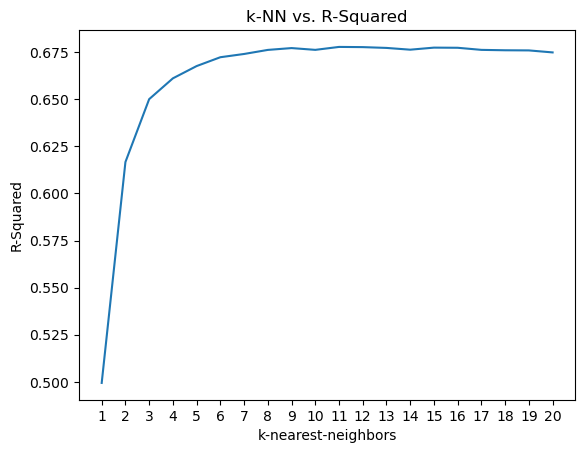

In [33]:
avg_scores = []
k_values = range(1,21)
for i in k_values:
    avg_scores.append(knn_kfolds(X_train_processed, y_train.values, i, random_state=41))

plt.plot(k_values, avg_scores)
plt.xlabel("k-nearest-neighbors")
plt.ylabel("R-Squared")
plt.xticks(k_values)
plt.title("k-NN vs. R-Squared")
plt.show()


In [34]:
k=11
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_processed, y_train)
        
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_kn_fe = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_kn_fe}')
print(f'Coefficient of Variation: {cv}')

RMSE: 319638.58157928014
R-Squared: 0.7314297951001528
Coefficient of Variation: 0.2991590095352051


### Problem 4.4 : Perform Decision Tree Regression 

Perform Decision Tree Regression using cross validation to tune any hyperparameters, such as `max_depth`. Be sure to use the **data with feature engineering applied.**

Then, using the optimal hyperparameters, train a Decision Tree Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Decision Tree Regression on the test dataset.

In [35]:
pipeline_DT = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor(max_depth=2, random_state=42))])

In [36]:
param_grid = {'regressor__max_depth': [2, 5, 10]}

grid_search = GridSearchCV(pipeline_DT, param_grid=param_grid, cv=kf)

# display the pipeline
grid_search

grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Best Accuracy: 0.6347156966791274
Best Parameters: {'regressor__max_depth': 10}


In [37]:
model = DecisionTreeRegressor(max_depth=10, random_state=40)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_dt_fe = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_dt_fe}')
print(f'Coefficient of Variation: {cv}')

RMSE: 355653.37426562404
R-Squared: 0.6674987305017799
Coefficient of Variation: 0.33286629748345314


### Problem 4.5 : Perform Random Forest Regression

Perform Random Forest Regression using cross validation to tune any hyperparameters, such as `n_estimators`. Be sure to use the **data with feature engineering applied.**

Then, using the optimal hyperparameters, train a Random Forest Regressor on the entirety of the training data and predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Random Forest Regression on the test dataset.

In [38]:
pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators = 50, max_depth=2, random_state=42))])

In [39]:
param_grid = {'regressor__n_estimators': [50, 100, 250],
                      'regressor__max_depth': [5]} #we did not have time to do more hyperparameters, so we picked 5 as an estimate

grid_search = GridSearchCV(pipeline_RF, param_grid=param_grid, cv=kf)

# display the pipeline
grid_search

grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Best Accuracy: 0.667793033058732
Best Parameters: {'regressor__max_depth': 5, 'regressor__n_estimators': 250}


In [40]:
model = RandomForestRegressor(n_estimators=250, max_depth=5, random_state=40)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf_fe = model.score(X_test_processed, y_test)
cv = rmse/np.mean(y_test)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2_rf_fe}')
print(f'Coefficient of Variation: {cv}')

RMSE: 367340.4332183464
R-Squared: 0.6452871607083718
Coefficient of Variation: 0.3438045545718228


## 5. Model Comparision

### Problem 5.1:

Create some visualizations that compare all the models results using either $R^{2}$ or RMSE. Be sure to include the following visualizations:
1. Performance comparison across the 4 baseline models from problem 2.
2. Performance comparison across the 4 feature engineered models from problem 4.
3. Performance comparison of the baseline models and the feature engineered models.

Feel free to include additional visualizations!

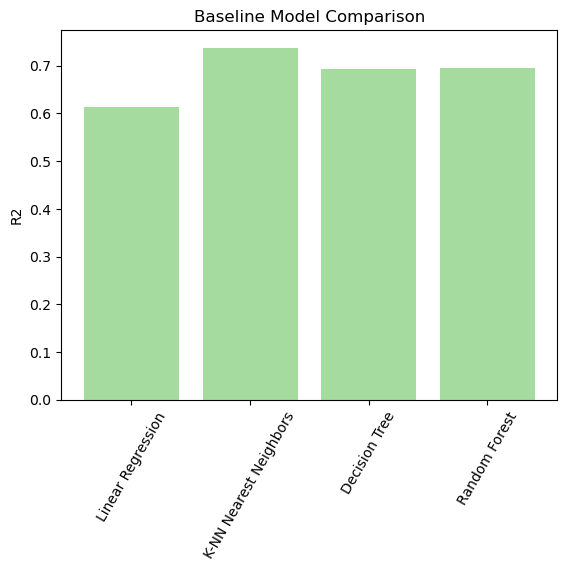

In [41]:
r2 = [r2_lin, r2_kn, r2_dt, r2_rf]
models = ['Linear Regression', 'K-NN Nearest Neighbors', 'Decision Tree', 'Random Forest']

plt.bar(models, 
        r2, 
        color='#a6dba0')
plt.xticks(rotation=60)
plt.title("Baseline Model Comparison")
plt.ylabel("R2")

plt.show()

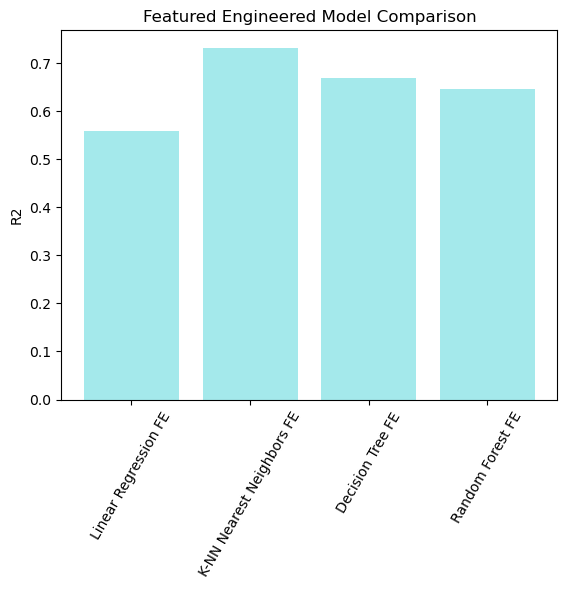

In [42]:
r2_fe = [r2_lin_fe, r2_kn_fe, r2_dt_fe, r2_rf_fe]
models_fe = ['Linear Regression FE', 'K-NN Nearest Neighbors FE', 'Decision Tree FE', 'Random Forest FE']

plt.bar(models_fe, 
        r2_fe, 
        color='#a4e9eb')
plt.xticks(rotation=60)
plt.title("Featured Engineered Model Comparison")
plt.ylabel("R2")

plt.show()

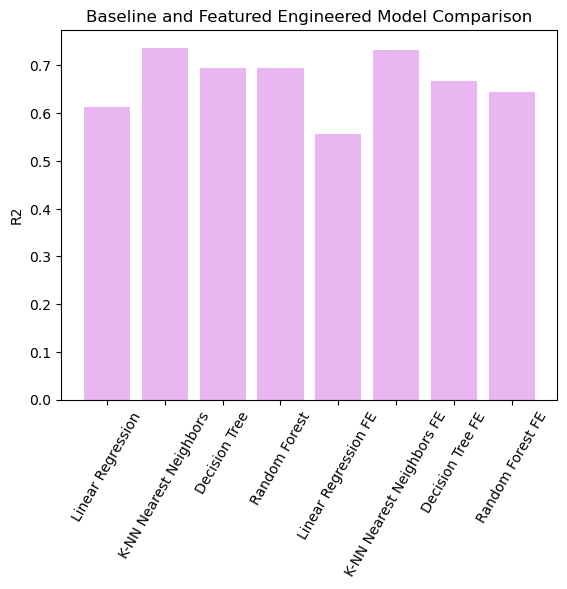

In [43]:
r2_combined = r2+r2_fe
models_combined = models+models_fe

plt.bar(models_combined, 
        r2_combined, 
        color='#e9b6f2')
plt.xticks(rotation=60)
plt.title("Baseline and Featured Engineered Model Comparison")
plt.ylabel("R2")

plt.show()

### Problem 5.2:

**Write up** Summarize your results and provide some crucial insights about the entire with and without feature engineering process such as which model performed the best and why, based on what metrics and indicators, etc. Which model benefited the most/the least from the feature engineering (if any)?

**Answer here:** (feel free to make multiple cells!)

Overall, we saw a decrease in performance across all 4 of our models when we performed feature extraction and selection. The most significantly unimproved models were the linear regression model and the random forest, while the KNN model decreased its R^2 the least significantly.

We think that the features that we created might not have been the best; adding features that don't mean as much will naturally make it harder for our models to be accurate in their predictions. 

That's it! Follow the submission instructions below:
* Restart your kernel and run all the cells
* Save your notebook
* Upload the .ipynb notebook directly to Gradescope

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

KeyError: 'otter'

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()